<a href="https://colab.research.google.com/github/matheusbuenowb/University-Network-Analysis/blob/main/TCC_An%C3%A1lise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Análise dos dados


#Estatísticas Gerais (ANÁLISE DESCARTADA)


#Análise por blocos, salas e por períodos (ANÁLISE DESCARTADA)






#Análise por bloco e meio de transmissão

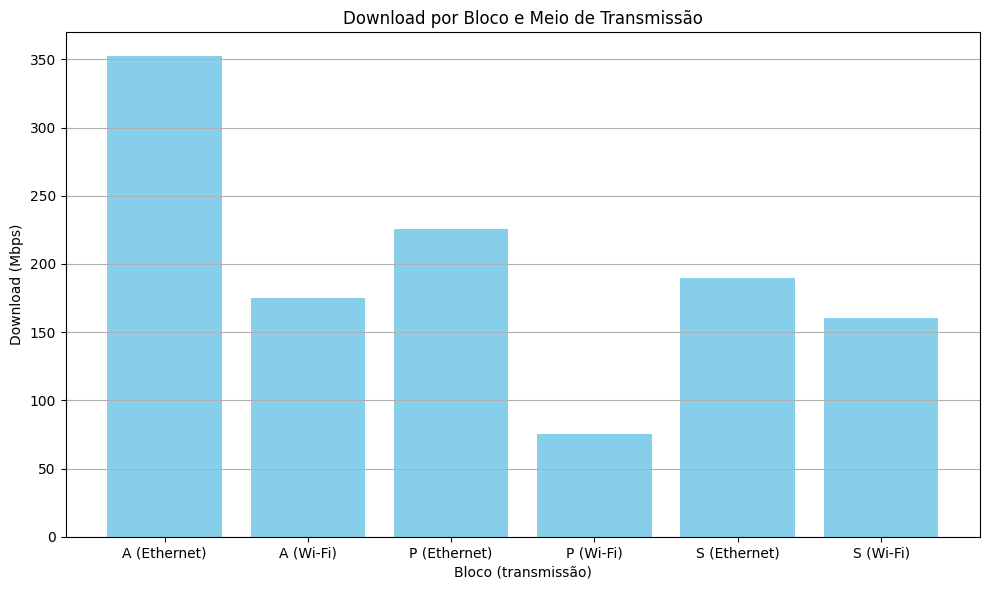

Tabela de Resultados para Download:

  Bloco Transmissão Download
0     A    Ethernet   352.19
1     A       Wi-Fi   175.15
2     P    Ethernet   225.41
3     P       Wi-Fi    75.39
4     S    Ethernet   189.37
5     S       Wi-Fi   160.07


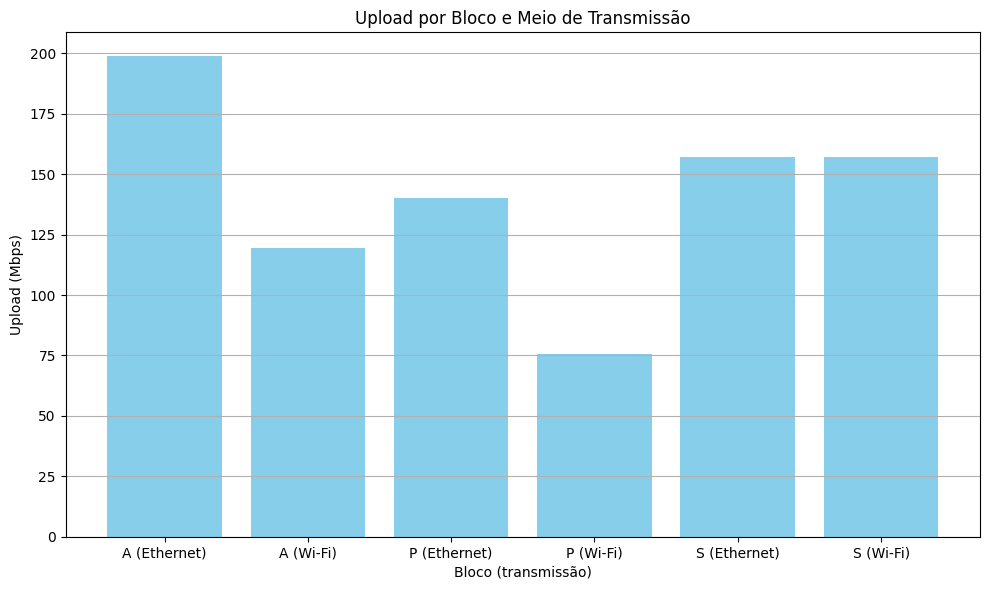

Tabela de Resultados para Upload:

  Bloco Transmissão  Upload
0     A    Ethernet  198.74
1     A       Wi-Fi  119.36
2     P    Ethernet  140.00
3     P       Wi-Fi   75.48
4     S    Ethernet  157.06
5     S       Wi-Fi  157.15


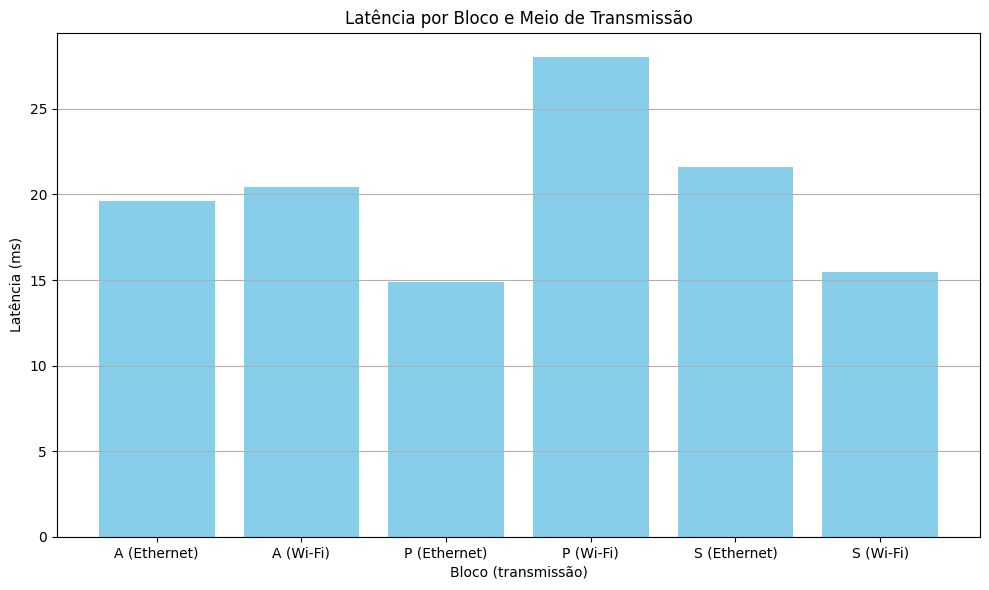

Tabela de Resultados para Latência:

  Bloco Transmissão Latência
0     A    Ethernet    19.63
1     A       Wi-Fi    20.46
2     P    Ethernet    14.88
3     P       Wi-Fi    28.04
4     S    Ethernet    21.59
5     S       Wi-Fi    15.45


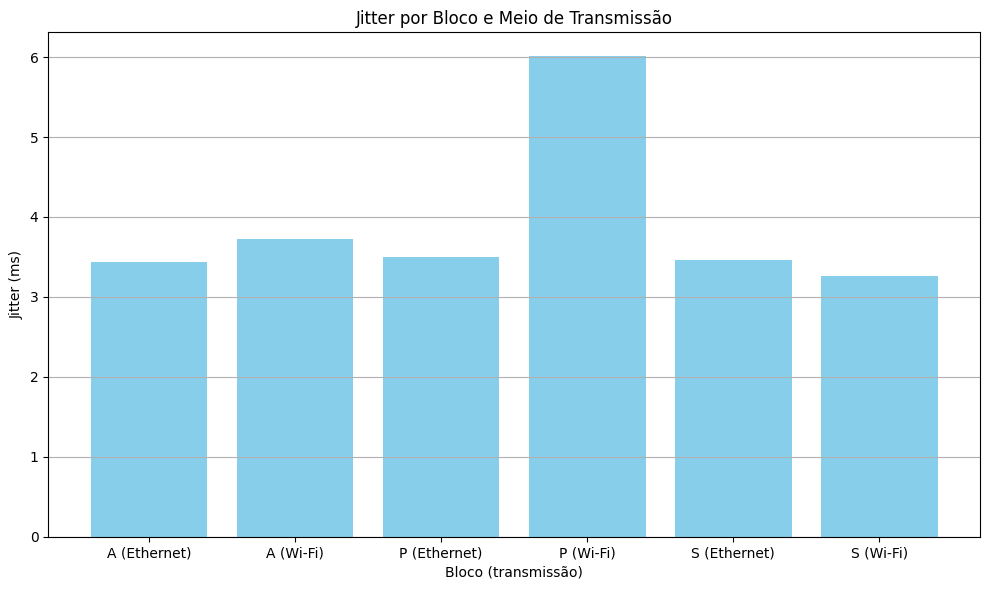

Tabela de Resultados para Jitter:

  Bloco Transmissão Jitter
0     A    Ethernet   3.44
1     A       Wi-Fi   3.73
2     P    Ethernet   3.50
3     P       Wi-Fi   6.01
4     S    Ethernet   3.46
5     S       Wi-Fi   3.27


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

#data = pd.read_csv('Testes.csv', delimiter=',')
data = pd.read_csv('/content/TestesAmostras100.csv', delimiter=',')

# Agrupamento por bloco e meio de transmissão e calcular as médias de Download, Upload, Ping e Jitter para cada grupo
#grouped_data = data.groupby(['Bloco', 'Transmissão']).mean()[['Download', 'Upload', 'Latência', 'Jitter']].reset_index()

grouped_data = data.pivot_table(index=['Bloco', 'Transmissão'],
                                values=['Download', 'Upload', 'Latência', 'Jitter'],
                                aggfunc='mean').reset_index()

#Gerando gráficos por bloco e meio de transmissão
metrics = ['Download', 'Upload', 'Latência', 'Jitter']
for metric in metrics:
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(grouped_data)), grouped_data[metric], color='skyblue')
    plt.xlabel('Bloco (transmissão)')
    if(metric == 'Download' or metric == 'Upload'):
      plt.ylabel(metric + " (Mbps)")
    else:
      plt.ylabel(metric + " (ms)")
    plt.title(f'{metric} por Bloco e Meio de Transmissão')
    plt.xticks(range(len(grouped_data)), [f'{row["Bloco"]} ({row["Transmissão"]})' for index, row in grouped_data.iterrows()])
    #plt.xticks(range(len(grouped_data)), [f'{row["Bloco"]} ({row["Transmissão"]})' for index, row in grouped_data.iterrows()], rotation=45)
    #Linha comentada com o design de rotação 45º
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

    print(f'Tabela de Resultados para {metric}:\n')
    results = grouped_data.applymap(lambda x: '{:.2f}'.format(x) if isinstance(x, (int, float)) else str(x))
    columns = ['Bloco', 'Transmissão', metric]
    print(results[columns])
    plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('/content/TestesAmostras100.csv', delimiter=',')

In [ ]:
# Calcular o limite superior para os outliers (por exemplo, 95%)
q95 = data['Latência'].quantile(0.95)

# Filtrar os outliers
outliers = data[data['Latência'] > q95]

# Contar os outliers
num_outliers = outliers.shape[0]

print(f"Número de outliers de latência: {num_outliers}")
print(outliers.nlargest(10, 'Latência'))  # Os 10 maiores valores de latência


In [ ]:
# Calcular o limite superior para os outliers (por exemplo, 95%)
q95 = data['Jitter'].quantile(0.95)

# Filtrar os outliers
outliers = data[data['Jitter'] > q95]

# Contar os outliers
num_outliers = outliers.shape[0]

print(f"Número de outliers de jitter: {num_outliers}")
print(outliers.nlargest(10, 'Jitter'))  # Os 10 maiores valores de latência

In [ ]:
# Calcular o limite inferior para os outliers (por exemplo, 5%)
q5 = data['Download'].quantile(0.05)

# Filtrar os outliers
outliers = data[data['Download'] < q5]

# Contar os outliers
num_outliers = outliers.shape[0]

print(f"Número de outliers de Download: {num_outliers}")
print(outliers.nsmallest(10, 'Download'))  # Os 10 menores valores de Download

# Calcular o limite inferior para os outliers (por exemplo, 5%)
q5 = data['Upload'].quantile(0.05)

# Filtrar os outliers
outliers = data[data['Upload'] < q5]

# Contar os outliers
num_outliers = outliers.shape[0]

print(f"\nNúmero de outliers de Upload: {num_outliers}")
print(outliers.nsmallest(40, 'Upload'))  # Os 10 menores valores de Upload


In [ ]:
# Valores distintos em uma coluna
valores_distintos = data['Servidor'].unique()
valores_distintos


#Análise por bloco, meio de transmissão e período dia

<ipython-input-17-df8b8faf6aa3>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Periodo'] = pd.cut(pd.to_datetime(data['Horário']).dt.hour,


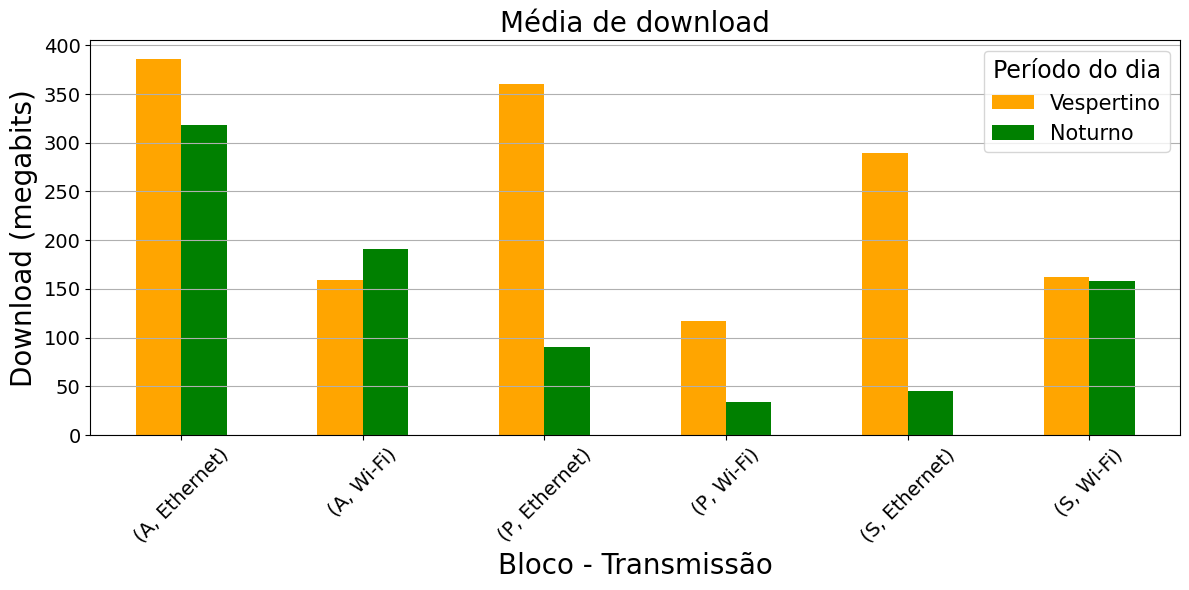

Resultados para a média de taxa de transmissão de Download (Megabits):



Periodo             Vespertino      Noturno
Bloco Transmissão                          
A     Ethernet     385.78 Mbps  318.61 Mbps
      Wi-Fi        159.38 Mbps  190.92 Mbps
P     Ethernet     360.53 Mbps   90.28 Mbps
      Wi-Fi         117.2 Mbps   33.59 Mbps
S     Ethernet     289.14 Mbps   45.79 Mbps
      Wi-Fi        162.16 Mbps  157.99 Mbps

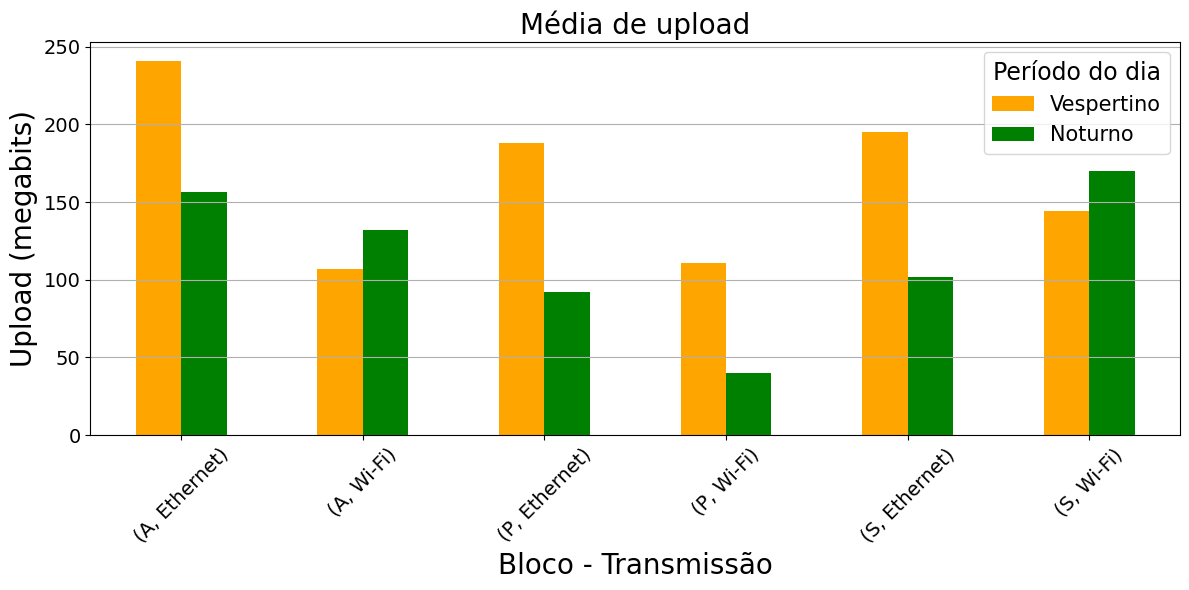

Resultados para a média de taxa de transmissão de Upload (Megabits):



Periodo             Vespertino      Noturno
Bloco Transmissão                          
A     Ethernet     241.02 Mbps  156.46 Mbps
      Wi-Fi        106.66 Mbps  132.07 Mbps
P     Ethernet     187.85 Mbps   92.16 Mbps
      Wi-Fi        110.81 Mbps   40.16 Mbps
S     Ethernet     195.28 Mbps  102.07 Mbps
      Wi-Fi        144.41 Mbps  169.89 Mbps

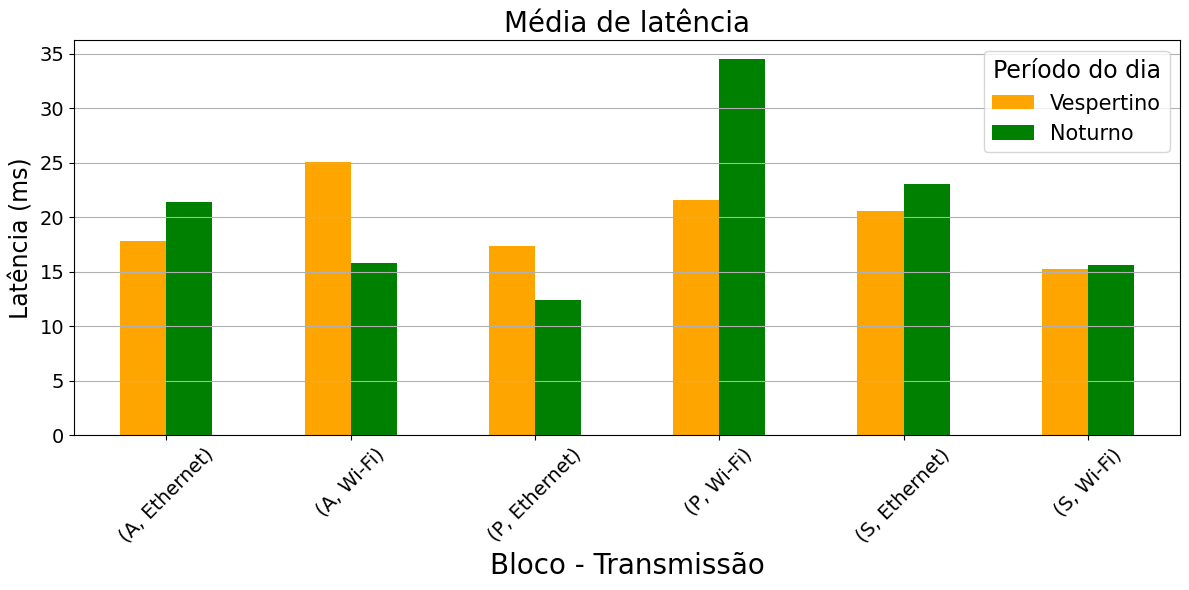

Resultados para a média de tempo de resposta de Latência (Ms):



Periodo           Vespertino   Noturno
Bloco Transmissão                     
A     Ethernet      17.86 ms   21.4 ms
      Wi-Fi         25.11 ms  15.81 ms
P     Ethernet      17.35 ms  12.41 ms
      Wi-Fi         21.56 ms  34.52 ms
S     Ethernet      20.55 ms   23.1 ms
      Wi-Fi         15.25 ms  15.64 ms

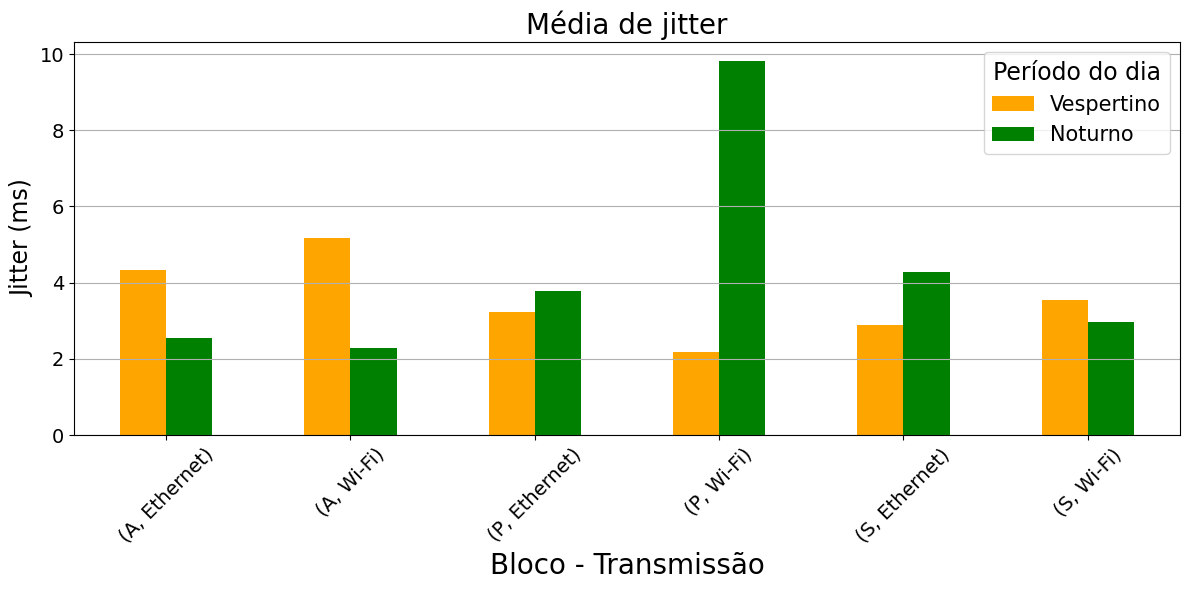

Resultados para a média de tempo de resposta de Jitter (Ms):



Periodo           Vespertino  Noturno
Bloco Transmissão                    
A     Ethernet       4.35 ms  2.54 ms
      Wi-Fi          5.17 ms  2.29 ms
P     Ethernet       3.22 ms  3.78 ms
      Wi-Fi          2.19 ms  9.83 ms
S     Ethernet       2.88 ms  4.29 ms
      Wi-Fi          3.56 ms  2.98 ms

In [ ]:
#É adicionada uma nova coluna para representar o período do dia
data['Periodo'] = pd.cut(pd.to_datetime(data['Horário']).dt.hour,
                         bins=[0, 6, 12, 18, 24],
                         labels=['Madrugada', 'Matutino', 'Vespertino', 'Noturno'])

#Aqui os dados são agrupados por bloco, meio de transmissão e período do dia, e calcular as médias
grouped_data = data.pivot_table(index=['Bloco', 'Transmissão', 'Periodo'],
                                values=['Download', 'Upload', 'Latência', 'Jitter'],
                                aggfunc='mean').reset_index()

metrics = ['Download', 'Upload', 'Latência', 'Jitter']

for metric in metrics:
    plt.figure(figsize=(12, 6))
    grouped_data_pivot = grouped_data.pivot_table(index=['Bloco', 'Transmissão'], columns='Periodo', values=metric)
    grouped_data_pivot.plot(kind='bar', rot=45, ax=plt.gca(), color=['orange', 'green'])
    plt.xlabel('Bloco - Transmissão', fontsize=20)
    if metric == 'Download' or metric == 'Upload':
        plt.ylabel(metric + ' (megabits)', fontsize=20)
    else:
        plt.ylabel(metric + ' (ms)', fontsize=17)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.title(f'Média de {metric.lower()}', fontsize=20)
    plt.legend(title='Período do dia', fontsize=15, title_fontsize=17)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

    grouped_data_pivot = grouped_data_pivot.round(2)

    measures = {'Download': 'Mbps', 'Upload': 'Mbps', 'Latência': 'ms', 'Jitter': 'ms'}
    for period in grouped_data_pivot.columns:
        grouped_data_pivot[period] = grouped_data_pivot[period].astype(str) + ' ' + measures[metric]

    if metric == 'Download' or metric == 'Upload':
        print(f'Resultados para a média de taxa de transmissão de {metric} (Megabits):\n')
    else:
        print(f'Resultados para a média de tempo de resposta de {metric} (Ms):\n')
    display(grouped_data_pivot)
    plt.show()


#Análise por bloco, meio de transmissão Ethernet e período dia

In [ ]:
#Adicionando uma nova coluna para representar o período do dia
data['Periodo'] = pd.cut(pd.to_datetime(data['Horário']).dt.hour,
                         bins=[0, 6, 12, 18, 24],
                         labels=['Madrugada', 'Matutino', 'Vespertino', 'Noturno'])

ethernet_data = data[data['Transmissão'] == 'Ethernet']
grouped_data = ethernet_data.pivot_table(index=['Bloco', 'Transmissão', 'Periodo'],
                                values=['Download', 'Upload', 'Latência', 'Jitter'],
                                aggfunc='mean').reset_index()

metrics = ['Download', 'Upload', 'Latência', 'Jitter']

for metric in metrics:
    plt.figure(figsize=(12, 6))
    grouped_data_pivot = grouped_data.pivot_table(index=['Bloco', 'Transmissão'], columns='Periodo', values=metric)
    grouped_data_pivot.plot(kind='bar', rot=45, ax=plt.gca(), color = ['orange', 'green'])
    if(metric == 'Download' or metric == 'Upload'):
      plt.ylabel(metric + ' (Megabits)')
    else:
      plt.ylabel(metric + ' (Ms)')
    plt.xlabel('Bloco - Transmissão')
    plt.title(f'Média de {metric}')
    plt.legend(title='Período do Dia')
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

    grouped_data_pivot = grouped_data_pivot.round(2)

    if(metric == 'Download' or metric == 'Upload'):
      print(f'Resultados para a média de taxa de transmissão de {metric} (Megabits):\n')
    else:
      print(f'Resultados para a média de tempo de resposta de {metric} (Ms):\n')
    display(grouped_data_pivot)
    plt.show()


#Conclusões em construção

Como foi possível perceber, no bloco A as taxas de transmissões de download e upload foram superiores aos blocos P e S, onde a diferença é maior ainda comparando entre os períodos noturno. Pode-se inferir que este motivo esteja relacionado ao fato de que no Bloco A a prevalência de salas teóricas sejam maior do que laboratórios, onde possuem computadores que são utilizados pelos discentes. Além disso, é importante destacar que os curso bacharelado de Engenharia de Software e tecnólogo de Análise e Desenvolvimento de Sistemas possuem grande parte de suas aulas situadas no bloco P, o que contribui para que a qualidade de conexão seja inferior neste bloco.

Quanto ao quesito latência e jitter, não houveram significativas diferenças, o que é esperado dado ao meio de transmissão Ethernet ser excelente.


#Análise por bloco, meio de transmissão Wi-Fi e período dia

In [ ]:
#Adicionando uma nova coluna para representar o período do dia
data['Periodo'] = pd.cut(pd.to_datetime(data['Horário']).dt.hour,
                         bins=[0, 6, 12, 18, 24],
                         labels=['Madrugada', 'Matutino', 'Vespertino', 'Noturno'])

wi_fi_data = data[data['Transmissão'] == 'Wi-Fi']
grouped_data = wi_fi_data.pivot_table(index=['Bloco', 'Transmissão', 'Periodo'],
                                values=['Download', 'Upload', 'Latência', 'Jitter'],
                                aggfunc='mean').reset_index()

metrics = ['Download', 'Upload', 'Latência', 'Jitter']

for metric in metrics:
    plt.figure(figsize=(12, 6))
    grouped_data_pivot = grouped_data.pivot_table(index=['Bloco', 'Transmissão'], columns='Periodo', values=metric)
    grouped_data_pivot.plot(kind='bar', rot=45, ax=plt.gca(), color = ['orange', 'green'])
    plt.xlabel('Bloco - Transmissão')
    if(metric == 'Download' or metric == 'Upload'):
      plt.ylabel(metric + ' (Megabits)')
    else:
      plt.ylabel(metric + ' (Ms)')
    plt.title(f'Média de {metric}')
    plt.legend(title='Período do Dia')
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()
    #arredonda os resultados para 2 casas decimais
    grouped_data_pivot = grouped_data_pivot.round(2)

    if(metric == 'Download' or metric == 'Upload'):
      print(f'Resultados para a média de taxa de transmissão de {metric} (Megabits):\n')
    else:
      print(f'Resultados para a média de tempo de resposta de {metric} (Ms):\n')
    display(grouped_data_pivot)
    plt.show()

#Conclusões em construção

Como foi possível perceber, no meio de transmissão de Wi-Fi o bloco S se sobressaiu melhor na maioria dos resultados.

Quanto ao quesito latência e jitter, no meio de transmissão Wi-Fi também não houveram significativas diferenças, com exceção do experimento noturno no Bloco P. Isto pode ser esperado, dado que o meio de transmissão Wi-Fi pode ser considerado instável por haver uma maior chance de interferências eletromagnéticas, sejam por sinais de outras redes como também de redes móveis ou tecnologias similares (Bluetooth).

#Análise da variância, desvio padrão e mediana por experimento

In [ ]:
import itertools

metricas = ['Download', 'Upload', 'Latência', 'Jitter']
medidas = ['Variação', 'Desvio Padrão', 'Mediana']

# dicionário para armazenar os resultados
resultados_dict = {}

Bloco = ['A', 'P', 'S']
Periodo = ['Vespertino', 'Noturno']
Transmissao = ['Ethernet', 'Wi-Fi']

combinacoes = list(itertools.product(Bloco, Periodo, Transmissao))

resultados_experimento_df = []

#Loop para calcular as estatísticas para cada métrica
for Bloco, Periodo, Transmissao in combinacoes:
  for metrica in metricas:
      #Passa pelos níveis
      experiment_data = data[(data['Bloco'] == Bloco) &
                            (data['Periodo'] == Periodo) &
                            (data['Transmissão'] == Transmissao)]

      variancia = experiment_data[metrica].var().round(2)
      desvio_padrao = experiment_data[metrica].std().round(2)
      mediana = experiment_data[metrica].median().round(2)

      #Adiciona os resultados ao dic
      resultados_dict[metrica] = [variancia, desvio_padrao, mediana]
  print('Resultados do Experimento (Bloco ' + Bloco + ', Período ' + Periodo +
        ', Meio de transmissão ' + Transmissao + ')')
  resultados_experimento_df.append(pd.DataFrame(resultados_dict, index=medidas))


#armazena os dados em um novo df
#resultados_experimento_df = pd.DataFrame(resultados_dict, index=medidas)

# Exibir o DataFrame
#print('Resultados do Experimento:')


Resultados do Experimento (Bloco A, Período Vespertino, Meio de transmissão Ethernet)
Resultados do Experimento (Bloco A, Período Vespertino, Meio de transmissão Wi-Fi)
Resultados do Experimento (Bloco A, Período Noturno, Meio de transmissão Ethernet)
Resultados do Experimento (Bloco A, Período Noturno, Meio de transmissão Wi-Fi)
Resultados do Experimento (Bloco P, Período Vespertino, Meio de transmissão Ethernet)
Resultados do Experimento (Bloco P, Período Vespertino, Meio de transmissão Wi-Fi)
Resultados do Experimento (Bloco P, Período Noturno, Meio de transmissão Ethernet)
Resultados do Experimento (Bloco P, Período Noturno, Meio de transmissão Wi-Fi)
Resultados do Experimento (Bloco S, Período Vespertino, Meio de transmissão Ethernet)
Resultados do Experimento (Bloco S, Período Vespertino, Meio de transmissão Wi-Fi)
Resultados do Experimento (Bloco S, Período Noturno, Meio de transmissão Ethernet)
Resultados do Experimento (Bloco S, Período Noturno, Meio de transmissão Wi-Fi)


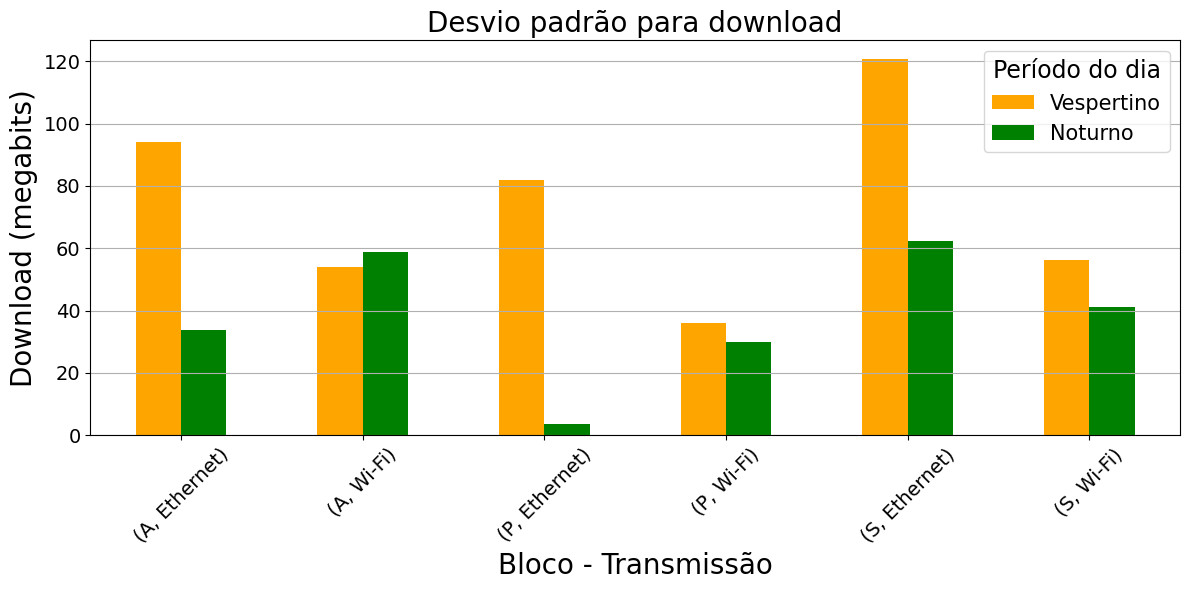

Resultados para o desvio padrão de taxa de transmissão de Download (Megabits):



Periodo             Vespertino     Noturno
Bloco Transmissao                         
A     Ethernet      93.94 Mbps  33.86 Mbps
      Wi-Fi         53.88 Mbps  58.83 Mbps
P     Ethernet      81.93 Mbps   3.72 Mbps
      Wi-Fi         36.03 Mbps  29.77 Mbps
S     Ethernet     120.66 Mbps  62.16 Mbps
      Wi-Fi         56.08 Mbps  41.15 Mbps

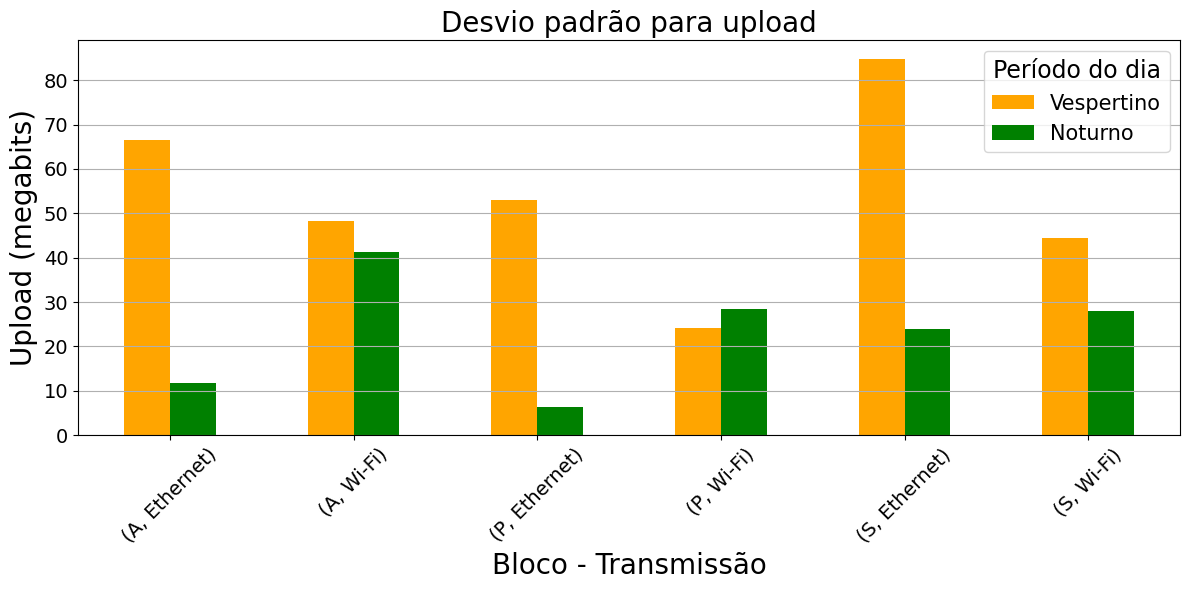

Resultados para o desvio padrão de taxa de transmissão de Upload (Megabits):



Periodo            Vespertino     Noturno
Bloco Transmissao                        
A     Ethernet     66.51 Mbps  11.77 Mbps
      Wi-Fi        48.34 Mbps  41.28 Mbps
P     Ethernet     52.97 Mbps   6.46 Mbps
      Wi-Fi        24.06 Mbps  28.38 Mbps
S     Ethernet     84.75 Mbps  23.84 Mbps
      Wi-Fi        44.46 Mbps  27.95 Mbps

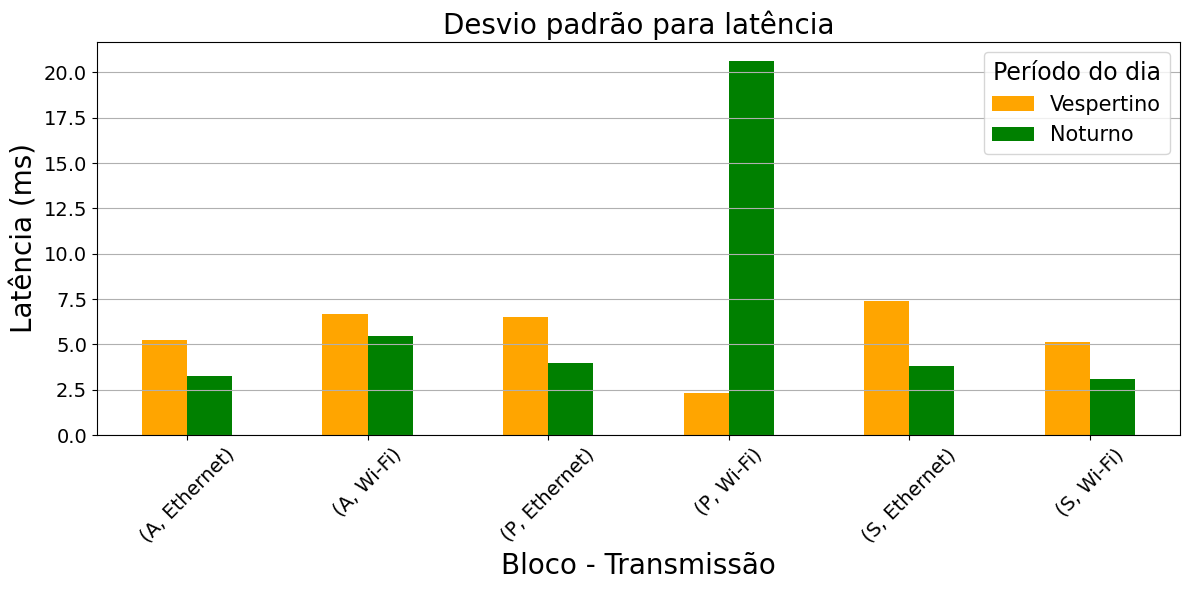

Resultados para o desvio padrão de tempo de resposta de Latência (Ms):



Periodo           Vespertino   Noturno
Bloco Transmissao                     
A     Ethernet       5.24 ms   3.26 ms
      Wi-Fi          6.69 ms   5.49 ms
P     Ethernet        6.5 ms   3.96 ms
      Wi-Fi          2.35 ms  20.65 ms
S     Ethernet       7.39 ms   3.79 ms
      Wi-Fi          5.14 ms   3.07 ms

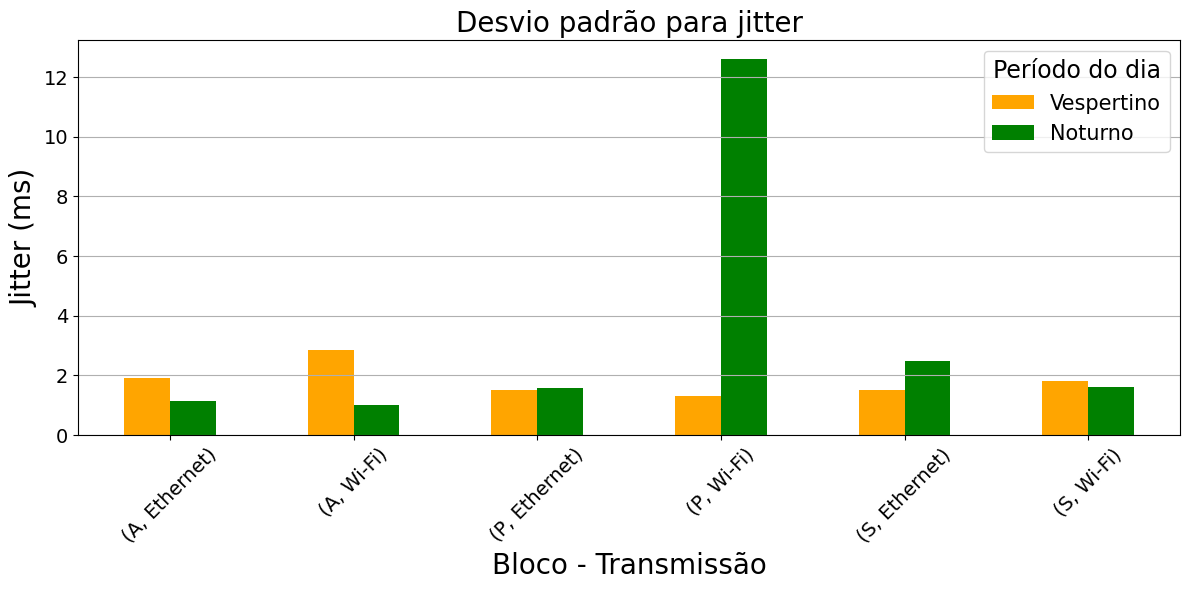

Resultados para o desvio padrão de tempo de resposta de Jitter (Ms):



Periodo           Vespertino  Noturno
Bloco Transmissao                    
A     Ethernet       1.91 ms  1.14 ms
      Wi-Fi          2.87 ms  1.02 ms
P     Ethernet        1.5 ms  1.59 ms
      Wi-Fi           1.3 ms  12.6 ms
S     Ethernet        1.5 ms   2.5 ms
      Wi-Fi           1.8 ms  1.63 ms

In [ ]:
import itertools
import pandas as pd
import matplotlib.pyplot as plt

metrics = ['Download', 'Upload', 'Latência', 'Jitter']

# Dicionário para armazenar os resultados
results_dict = {}

#Definição dos níveis de experimento
Bloco = ['A', 'P', 'S']
Periodo = ['Vespertino', 'Noturno']
Transmissao = ['Ethernet', 'Wi-Fi']

#Combinações possíveis de experimentos
combinations = list(itertools.product(Bloco, Periodo, Transmissao))

#Lista para armazenar os DF dos resultados
results_experiment_df = []

#Loop para calcular as estatísticas para cada métrica
for Bloco, Periodo, Transmissao in combinations:
    #Inicializa o dicionário de resultados para o experimento atual
    results_dict_experiment = {'Bloco': Bloco, 'Periodo': Periodo, 'Transmissao': Transmissao}

    for metric in metrics:
        # Filtra os dados para o experimento atual
        experiment_data = data[(data['Bloco'] == Bloco) &
                               (data['Periodo'] == Periodo) &
                               (data['Transmissão'] == Transmissao)]

        #Calcula o desvio padrão para a métrica atual
        standard_deviation = experiment_data[metric].std().round(2)

        #Adiciona o resultado obtido do desvio padrão ao dicionário de resultados do experimento
        results_dict_experiment[metric] = standard_deviation

    #Adiciona os resultados do experimento atual à lista de resultados
    results_experiment_df.append(results_dict_experiment)

#Armazena os resultados em um novo df para a geração de gráficos de barras
results_df = pd.DataFrame(results_experiment_df)

#Define a ordem dos períodos como categóricos
#de modo a deixar primeiro o vespertino, e depois noturno (nos gráficos e tabelas)
results_df['Periodo'] = pd.Categorical(results_df['Periodo'], categories=['Vespertino', 'Noturno'], ordered=True)

#Agrupa os dados para gerar o gráfico de barras
data_to_plot = results_df.set_index(['Bloco', 'Periodo', 'Transmissao'])[metrics]

for metric in metrics:
  #Plotando os gráficos de barras para os desvios padrão para cada métrica
  plt.figure(figsize=(12, 6))
  #data_to_plot[metric].plot(kind='bar', color= color, rot=45)
  grouped_data_pivot = data_to_plot.pivot_table(index=['Bloco', 'Transmissao'], columns='Periodo', values=metric)
  grouped_data_pivot.plot(kind='bar', rot=45, ax=plt.gca(), color = ['orange', 'green'])
  plt.xlabel('Bloco - Transmissão', fontsize = 20)
  if(metric == 'Download' or metric == 'Upload'):
    plt.ylabel(metric + ' (megabits)', fontsize = 20)
  else:
    plt.ylabel(metric + ' (ms)', fontsize = 20)
  plt.xticks(fontsize=14)
  plt.yticks(fontsize=14)
  plt.title(f'Desvio padrão para {metric.lower()}', fontsize = 20)
  plt.legend(title='Período do dia', fontsize=15, title_fontsize=17)
  plt.grid(axis='y')
  plt.tight_layout()
  plt.show()

  # Adiciona as medidas aos resultados do experimento
  measures = {'Download': 'Mbps', 'Upload': 'Mbps', 'Latência': 'ms', 'Jitter': 'ms'}
  for period in grouped_data_pivot.columns:
      grouped_data_pivot[period] = grouped_data_pivot[period].astype(str) + ' ' + measures[metric]


  if(metric == 'Download' or metric == 'Upload'):
    print(f'Resultados para o desvio padrão de taxa de transmissão de {metric} (Megabits):\n')
  else:
    print(f'Resultados para o desvio padrão de tempo de resposta de {metric} (Ms):\n')
  #display(results_df[['Bloco' ,'Periodo', 'Transmissao', metric]])
  display(grouped_data_pivot)



#Análise da variância, desvio padrão e mediana por experimento do tipo Ethernet


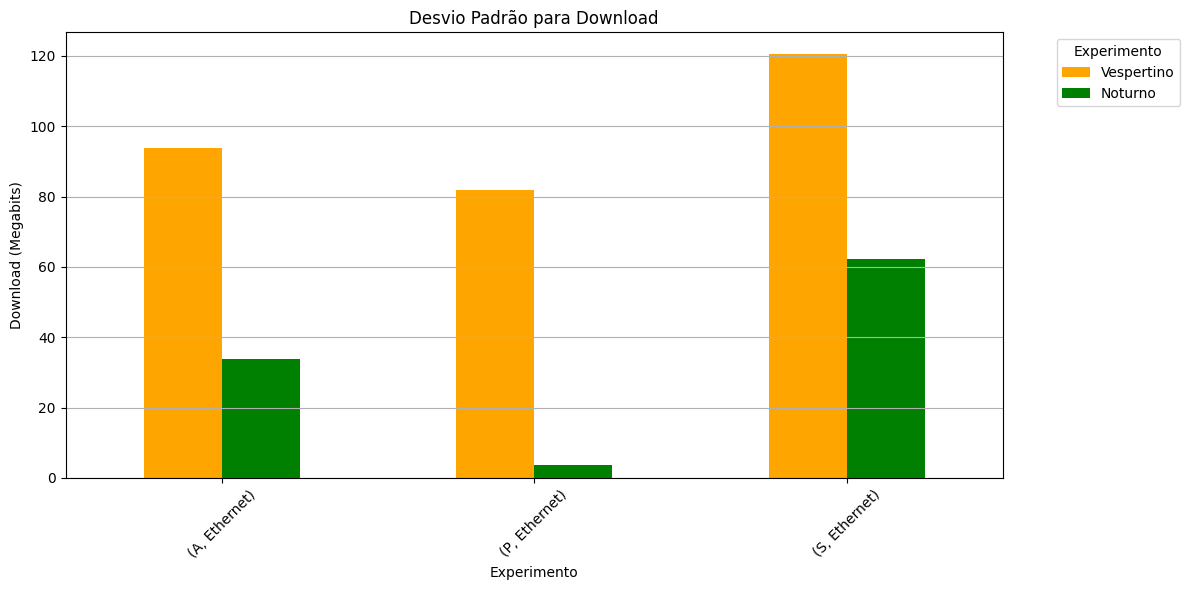

Resultados para a média de taxa de transmissão de Download (Megabits):

  Bloco     Periodo Transmissao  Download
0     A  Vespertino    Ethernet     93.94
1     A     Noturno    Ethernet     33.86
2     P  Vespertino    Ethernet     81.93
3     P     Noturno    Ethernet      3.72
4     S  Vespertino    Ethernet    120.66
5     S     Noturno    Ethernet     62.16


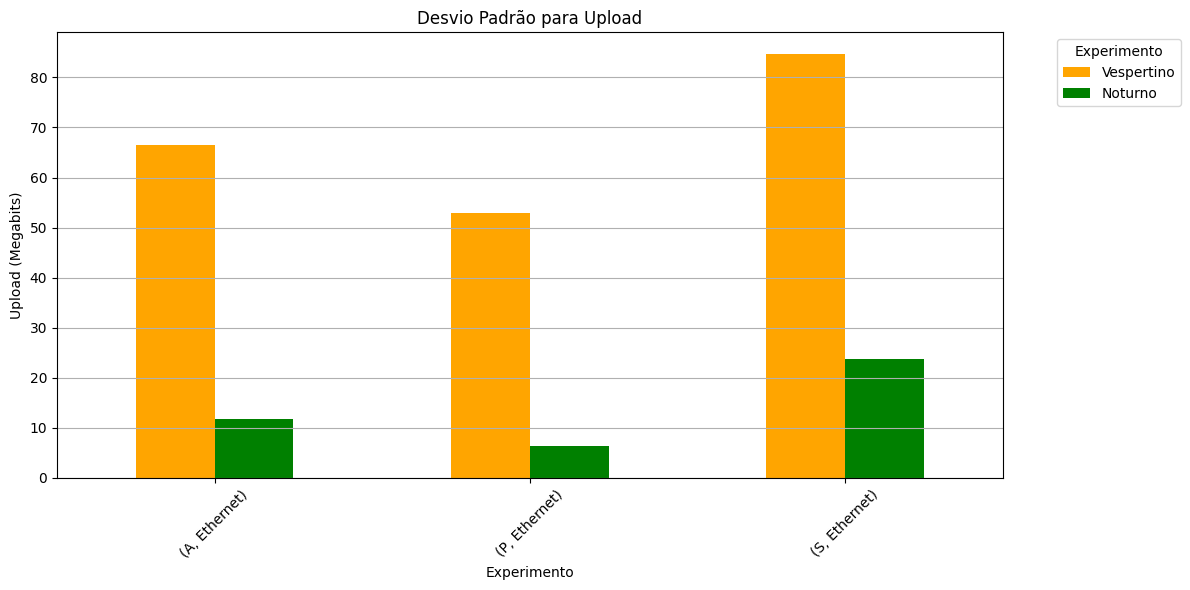

Resultados para a média de taxa de transmissão de Upload (Megabits):

  Bloco     Periodo Transmissao  Upload
0     A  Vespertino    Ethernet   66.51
1     A     Noturno    Ethernet   11.77
2     P  Vespertino    Ethernet   52.97
3     P     Noturno    Ethernet    6.46
4     S  Vespertino    Ethernet   84.75
5     S     Noturno    Ethernet   23.84


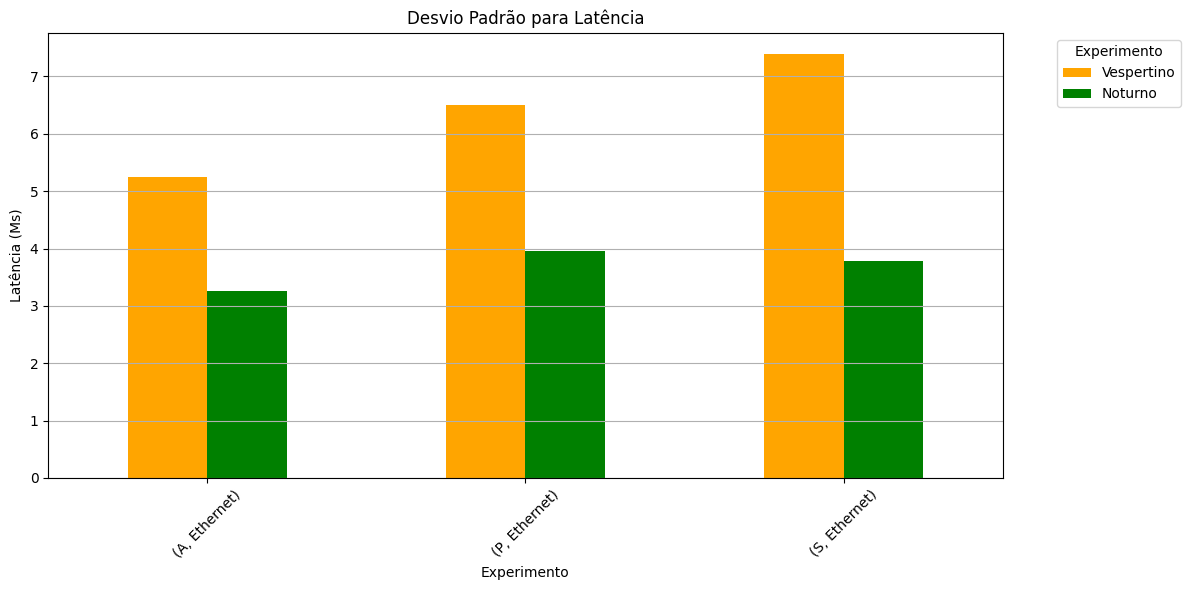

Resultados para a média de tempo de resposta de Latência (Ms):

  Bloco     Periodo Transmissao  Latência
0     A  Vespertino    Ethernet      5.24
1     A     Noturno    Ethernet      3.26
2     P  Vespertino    Ethernet      6.50
3     P     Noturno    Ethernet      3.96
4     S  Vespertino    Ethernet      7.39
5     S     Noturno    Ethernet      3.79


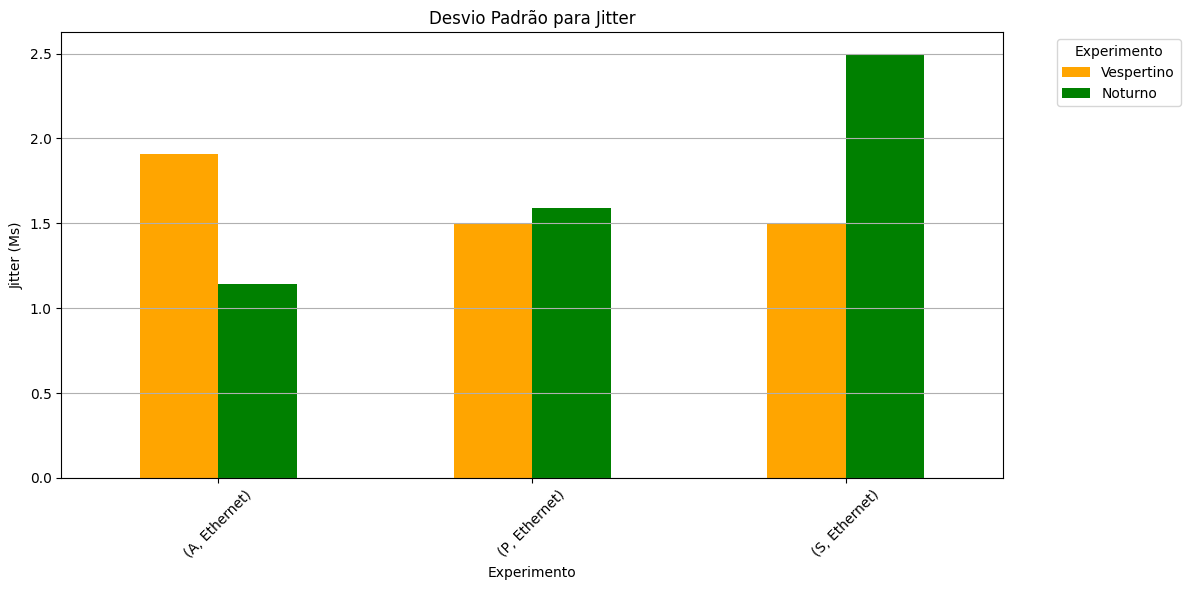

Resultados para a média de tempo de resposta de Jitter (Ms):

  Bloco     Periodo Transmissao  Jitter
0     A  Vespertino    Ethernet    1.91
1     A     Noturno    Ethernet    1.14
2     P  Vespertino    Ethernet    1.50
3     P     Noturno    Ethernet    1.59
4     S  Vespertino    Ethernet    1.50
5     S     Noturno    Ethernet    2.50


In [ ]:
import itertools
import pandas as pd
import matplotlib.pyplot as plt

metrics = ['Download', 'Upload', 'Latência', 'Jitter']

#Dicionário para armazenar os resultados
resultados_dict = {}

#Definição dos níveis
Bloco = ['A', 'P', 'S']
Periodo = ['Vespertino', 'Noturno']
Transmissao = ['Ethernet']

#Combinações de níveis
combinations = list(itertools.product(Bloco, Periodo, Transmissao))

# Lista para armazenar os DFs dos resultados
results_experiment_df = []

# Loop para calcular as estatísticas para cada métrica
for Bloco, Periodo, Transmissao in combinations:
    # Inicializa o dicionário de resultados para o experimento atual
    resultados_dict_experimento = {'Bloco': Bloco, 'Periodo': Periodo, 'Transmissao': Transmissao}

    for metric in metrics:
        #Filtra os dados para o experimento atual
        experiment_data = data[(data['Bloco'] == Bloco) &
                               (data['Periodo'] == Periodo) &
                               (data['Transmissão'] == Transmissao)]

        #Calcula o desvio padrão para a medida atual
        standard_deviation = experiment_data[metric].std().round(2)

        #Adiciona o resultado do desvio padrão ao dicionário de resultados do experimento
        resultados_dict_experimento[metric] = standard_deviation

    #Adiciona os resultados do experimento atual à lista de resultados
    results_experiment_df.append(resultados_dict_experimento)

#Os dados são armazenados em um novo DF
results_df = pd.DataFrame(results_experiment_df)

#Define a ordem dos períodos como categóricos
#de modo a deixar primeiro o vespertino, e depois noturno (nos gráficos e tabelas)
results_df['Periodo'] = pd.Categorical(results_df['Periodo'], categories=['Vespertino', 'Noturno'], ordered=True)

#Agrupa os dados para gerar o gráfico de barras
data_to_plot = results_df.set_index(['Bloco', 'Periodo', 'Transmissao'])[metrics]

for metric in metrics:
  # Plotando os gráficos de barras para os desvios padrão para cada medida
  plt.figure(figsize=(12, 6))
  #data_to_plot[metric].plot(kind='bar', color= color, rot=45)
  grouped_data_pivot = data_to_plot.pivot_table(index=['Bloco', 'Transmissao'], columns='Periodo', values=metric)
  grouped_data_pivot.plot(kind='bar', rot=45, ax=plt.gca(), color = ['orange', 'green'])
  plt.xlabel('Experimento')
  if(metric == 'Download' or metric == 'Upload'):
    plt.ylabel(metric + ' (Megabits)')
  else:
    plt.ylabel(metric + ' (Ms)')
  plt.title(f'Desvio Padrão para {metric}')
  plt.legend(title='Experimento', bbox_to_anchor=(1.05, 1), loc='upper left')
  plt.grid(axis='y')
  plt.tight_layout()
  plt.show()

  if(metric == 'Download' or metric == 'Upload'):
    print(f'Resultados para a média de taxa de transmissão de {metric} (Megabits):\n')
  else:
    print(f'Resultados para a média de tempo de resposta de {metric} (Ms):\n')
  print(results_df[['Bloco' ,'Periodo', 'Transmissao', metric]])


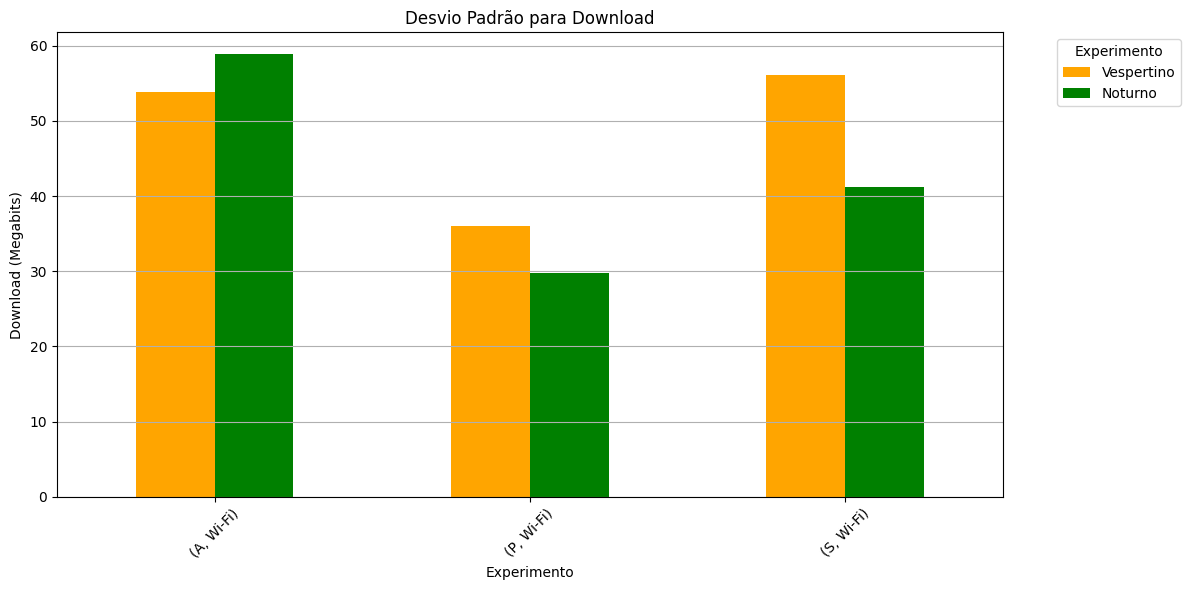

Resultados para a média de taxa de transmissão de Download (Megabits):

  Bloco     Periodo Transmissao  Download
0     A  Vespertino       Wi-Fi     53.88
1     A     Noturno       Wi-Fi     58.83
2     P  Vespertino       Wi-Fi     36.03
3     P     Noturno       Wi-Fi     29.77
4     S  Vespertino       Wi-Fi     56.08
5     S     Noturno       Wi-Fi     41.15


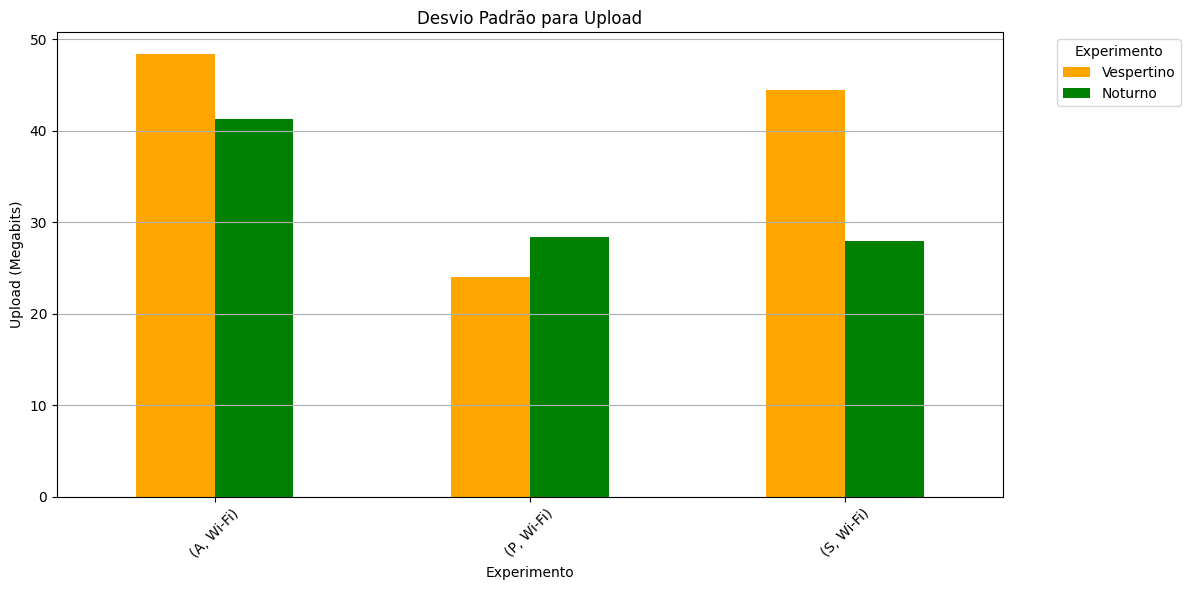

Resultados para a média de taxa de transmissão de Upload (Megabits):

  Bloco     Periodo Transmissao  Upload
0     A  Vespertino       Wi-Fi   48.34
1     A     Noturno       Wi-Fi   41.28
2     P  Vespertino       Wi-Fi   24.06
3     P     Noturno       Wi-Fi   28.38
4     S  Vespertino       Wi-Fi   44.46
5     S     Noturno       Wi-Fi   27.95


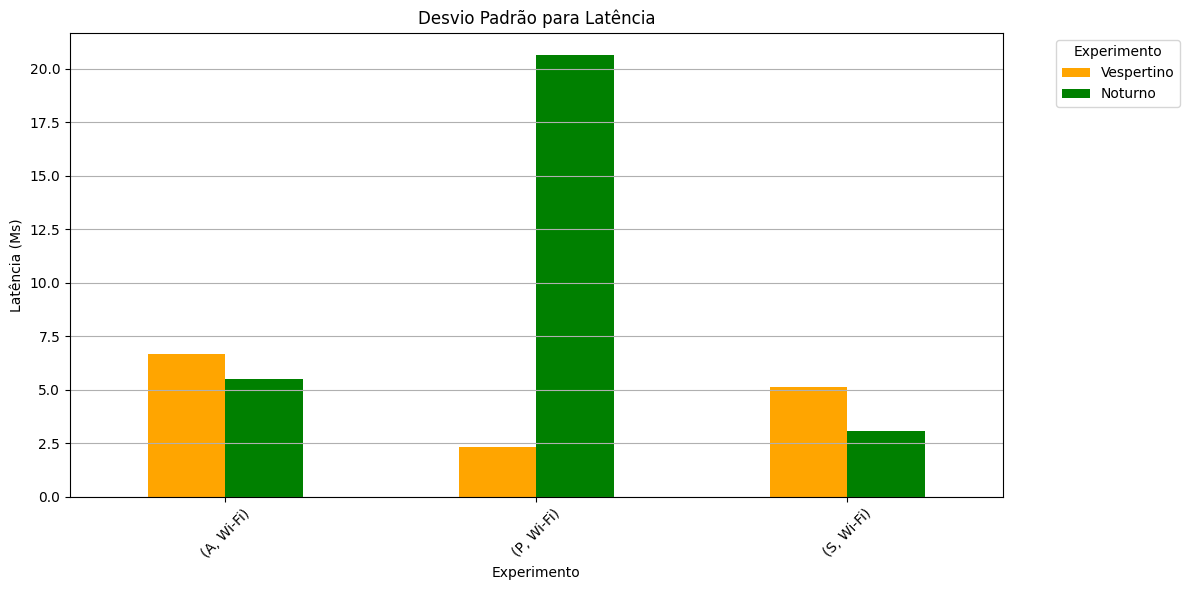

Resultados para a média de tempo de resposta de Latência (Ms):

  Bloco     Periodo Transmissao  Latência
0     A  Vespertino       Wi-Fi      6.69
1     A     Noturno       Wi-Fi      5.49
2     P  Vespertino       Wi-Fi      2.35
3     P     Noturno       Wi-Fi     20.65
4     S  Vespertino       Wi-Fi      5.14
5     S     Noturno       Wi-Fi      3.07


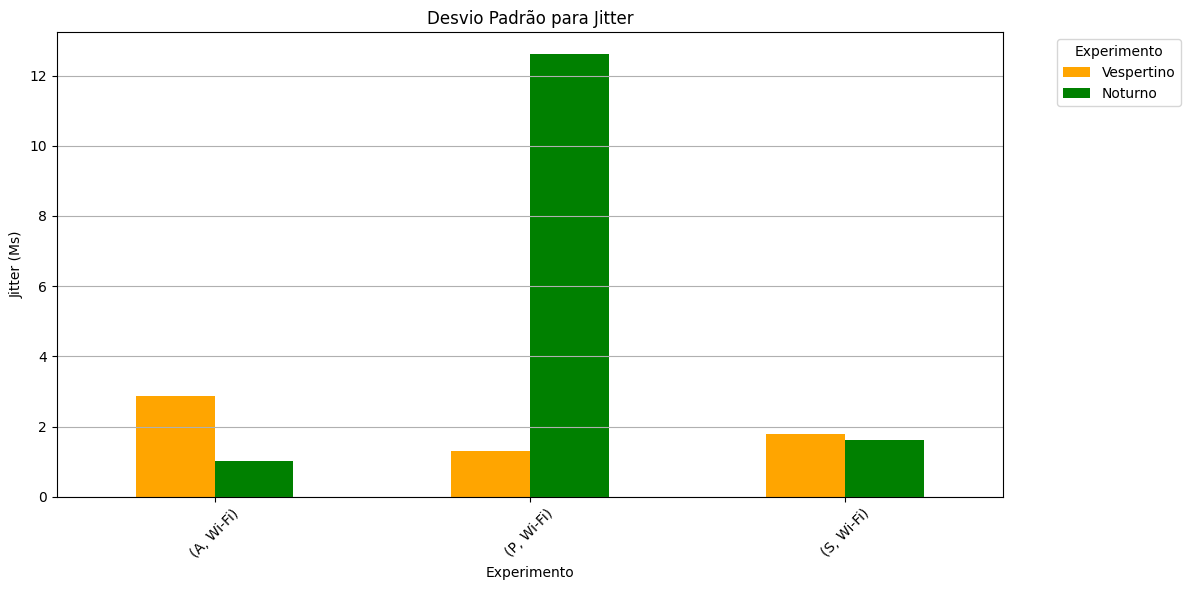

Resultados para a média de tempo de resposta de Jitter (Ms):

  Bloco     Periodo Transmissao  Jitter
0     A  Vespertino       Wi-Fi    2.87
1     A     Noturno       Wi-Fi    1.02
2     P  Vespertino       Wi-Fi    1.30
3     P     Noturno       Wi-Fi   12.60
4     S  Vespertino       Wi-Fi    1.80
5     S     Noturno       Wi-Fi    1.63


In [ ]:
import itertools
import pandas as pd
import matplotlib.pyplot as plt

metrics = ['Download', 'Upload', 'Latência', 'Jitter']

#Dicionário para armazenar os resultados
resultados_dict = {}

#Definição dos níveis
Bloco = ['A', 'P', 'S']
Periodo = ['Vespertino', 'Noturno']
Transmissao = ['Wi-Fi']

#Combinações de níveis
combinations = list(itertools.product(Bloco, Periodo, Transmissao))

# Lista para armazenar os DFs dos resultados
results_experiment_df = []

# Loop para calcular as estatísticas para cada métrica
for Bloco, Periodo, Transmissao in combinations:
    # Inicializa o dicionário de resultados para o experimento atual
    resultados_dict_experimento = {'Bloco': Bloco, 'Periodo': Periodo, 'Transmissao': Transmissao}

    for metric in metrics:
        #Filtra os dados para o experimento atual
        experiment_data = data[(data['Bloco'] == Bloco) &
                               (data['Periodo'] == Periodo) &
                               (data['Transmissão'] == Transmissao)]

        #Calcula o desvio padrão para a medida atual
        standard_deviation = experiment_data[metric].std().round(2)

        #Adiciona o resultado do desvio padrão ao dicionário de resultados do experimento
        resultados_dict_experimento[metric] = standard_deviation

    #Adiciona os resultados do experimento atual à lista de resultados
    results_experiment_df.append(resultados_dict_experimento)

#Os dados são armazenados em um novo DF
results_df = pd.DataFrame(results_experiment_df)

#Define a ordem dos períodos como categóricos
#de modo a deixar primeiro o vespertino, e depois noturno (nos gráficos e tabelas)
results_df['Periodo'] = pd.Categorical(results_df['Periodo'], categories=['Vespertino', 'Noturno'], ordered=True)

#Agrupa os dados para gerar o gráfico de barras
data_to_plot = results_df.set_index(['Bloco', 'Periodo', 'Transmissao'])[metrics]

for metric in metrics:
  # Plotando os gráficos de barras para os desvios padrão para cada medida
  plt.figure(figsize=(12, 6))
  #data_to_plot[metric].plot(kind='bar', color= color, rot=45)
  grouped_data_pivot = data_to_plot.pivot_table(index=['Bloco', 'Transmissao'], columns='Periodo', values=metric)
  grouped_data_pivot.plot(kind='bar', rot=45, ax=plt.gca(), color = ['orange', 'green'])
  plt.xlabel('Experimento')
  if(metric == 'Download' or metric == 'Upload'):
    plt.ylabel(metric + ' (Megabits)')
  else:
    plt.ylabel(metric + ' (Ms)')
  plt.title(f'Desvio Padrão para {metric}')
  plt.legend(title='Experimento', bbox_to_anchor=(1.05, 1), loc='upper left')
  plt.grid(axis='y')
  plt.tight_layout()
  plt.show()

  if(metric == 'Download' or metric == 'Upload'):
    print(f'Resultados para a média de taxa de transmissão de {metric} (Megabits):\n')
  else:
    print(f'Resultados para a média de tempo de resposta de {metric} (Ms):\n')
  print(results_df[['Bloco' ,'Periodo', 'Transmissao', metric]])


In [ ]:
resultados_df[['Bloco' ,'Periodo', 'Transmissao', metric]]



,Bloco,Periodo
0,A,Vespertino
1,A,Vespertino
2,A,Noturno
3,A,Noturno
4,P,Vespertino
5,P,Vespertino
6,P,Noturno
7,P,Noturno
8,S,Vespertino
9,S,Vespertino


In [ ]:
print('Bloco A \nPeríodo Vespertino\nMeio de transmissão Ethernet')
resultados_experimento_df[0]

Bloco A 
Período Vespertino
Meio de transmissão Ethernet


,Download,Upload,Latência,Jitter
Variação,8824.17,4423.86,27.43,3.66
Desvio Padrão,93.94,66.51,5.24,1.91
Mediana,395.50,269.00,18.00,4.20


In [ ]:
print('Bloco A\nPeríodo Vespertino\nMeio de transmissão Wi-Fi')
resultados_experimento_df[1]

Bloco A
Período Vespertino
Meio de transmissão Wi-Fi


,Download,Upload,Latência,Jitter
Variação,2903.01,2336.87,44.79,8.25
Desvio Padrão,53.88,48.34,6.69,2.87
Mediana,177.50,125.00,24.00,4.68


In [ ]:
print('Bloco A\nPeríodo Noturno\nMeio de transmissão Ethernet')
resultados_experimento_df[2]

Bloco A
Período Noturno
Meio de transmissão Ethernet


,Download,Upload,Latência,Jitter
Variação,1146.28,138.61,10.65,1.30
Desvio Padrão,33.86,11.77,3.26,1.14
Mediana,322.00,161.50,21.00,2.45


In [ ]:
print('Bloco A\nPeríodo Noturno\nMeio de transmissão Wi-Fi')
resultados_experimento_df[3]

Bloco A
Período Noturno
Meio de transmissão Wi-Fi


,Download,Upload,Latência,Jitter
Variação,3460.86,1704.25,30.14,1.04
Desvio Padrão,58.83,41.28,5.49,1.02
Mediana,209.50,149.00,15.00,2.16


In [ ]:
print('Bloco P\nPeríodo Vespertino\nMeio de transmissão Ethernet')
resultados_experimento_df[4]

Bloco P
Período Vespertino
Meio de transmissão Ethernet


,Download,Upload,Latência,Jitter
Variação,6711.77,2806.05,42.25,2.25
Desvio Padrão,81.93,52.97,6.50,1.50
Mediana,365.00,165.00,19.50,3.08


In [ ]:
print('Bloco P\nPeríodo Vespertino\nMeio de transmissão Wi-Fi')
resultados_experimento_df[5]

Bloco P
Período Vespertino
Meio de transmissão Wi-Fi


,Download,Upload,Latência,Jitter
Variação,1298.18,579.00,5.54,1.69
Desvio Padrão,36.03,24.06,2.35,1.30
Mediana,92.00,94.00,21.00,1.87


In [ ]:
print('Bloco P\nPeríodo Noturno\nMeio de transmissão Ethernet')
resultados_experimento_df[6]

Bloco P
Período Noturno
Meio de transmissão Ethernet


,Download,Upload,Latência,Jitter
Variação,13.82,41.79,15.70,2.52
Desvio Padrão,3.72,6.46,3.96,1.59
Mediana,92.00,94.00,12.00,3.75


In [ ]:
print('Bloco P\nPeríodo Noturno\nMeio de transmissão Wi-Fi')
resultados_experimento_df[7]

Bloco P
Período Noturno
Meio de transmissão Wi-Fi


,Download,Upload,Latência,Jitter
Variação,886.33,805.39,426.31,158.86
Desvio Padrão,29.77,28.38,20.65,12.60
Mediana,22.00,40.50,30.00,7.26


In [ ]:
print('Bloco S\nPeríodo Vespertino\nMeio de transmissão Ethernet')
resultados_experimento_df[8]

Bloco S
Período Vespertino
Meio de transmissão Ethernet


,Download,Upload,Latência,Jitter
Variação,14558.76,7183.23,54.63,2.25
Desvio Padrão,120.66,84.75,7.39,1.50
Mediana,309.00,138.00,18.50,2.50


In [ ]:
print('Bloco S\nPeríodo Vespertino\nMeio de transmissão Wi-Fi')
resultados_experimento_df[9]

Bloco S
Período Vespertino
Meio de transmissão Wi-Fi


,Download,Upload,Latência,Jitter
Variação,3145.15,1977.13,26.43,3.25
Desvio Padrão,56.08,44.46,5.14,1.80
Mediana,177.00,142.00,15.00,3.33


In [ ]:
print('Bloco S\nPeríodo Noturno\nMeio de transmissão Ethernet')
resultados_experimento_df[10]

Bloco S
Período Noturno
Meio de transmissão Ethernet


,Download,Upload,Latência,Jitter
Variação,3863.50,568.34,14.36,6.23
Desvio Padrão,62.16,23.84,3.79,2.50
Mediana,12.00,92.00,23.00,4.02


In [ ]:
print('Bloco S\nPeríodo Noturno\nMeio de transmissão Wi-Fi')
resultados_experimento_df[11]

Bloco S
Período Noturno
Meio de transmissão Wi-Fi


,Download,Upload,Latência,Jitter
Variação,1693.59,781.05,9.44,2.66
Desvio Padrão,41.15,27.95,3.07,1.63
Mediana,161.50,175.00,15.00,2.66


#Gráfico de dispersão em cada experimento (Descartado)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import itertools

#data = pd.read_csv('/content/TestesAmostras100.csv', delimiter=',')

#Gerando um gráfico de dispersão para analisar a relação entre Download e Upload com linha de tendência

Bloco = ['A', 'P', 'S']
Periodo = ['Vespertino', 'Noturno']
Transmissao = ['Ethernet', 'Wi-Fi']

combinacoes = list(itertools.product(Bloco, Periodo, Transmissao))

resultados_experimento_df = []

for Bloco, Periodo, Transmissao in combinacoes:

  data_experiment = data[(data['Bloco'] == Bloco) & (data['Periodo'] == Periodo) & (data['Transmissão'] == Transmissao)]

  plt.figure(figsize=(8, 6))
  plt.scatter(data_experiment['Download'], data_experiment['Upload'], alpha=0.5, color='blue', label='Dados')
  slope, intercept, r_value, p_value, std_err = linregress(data_experiment['Download'], data_experiment['Upload'])
  plt.plot(data_experiment['Download'], intercept + slope * data_experiment['Download'], color='red', label='Linha de Tendência')
  plt.title('Gráfico de Dispersão: Download x Upload')
  plt.xlabel('Download (Megabits)')
  plt.ylabel('Upload (Megabits)')
  plt.legend()
  plt.grid(True)
  plt.tight_layout()
  plt.show()


  # Dispersão: Latência x Jitter
  plt.figure(figsize=(8, 6))
  plt.scatter(data_experiment['Latência'], data_experiment['Jitter'], alpha=0.5, color='green')
  slope, intercept, r_value, p_value, std_err = linregress(data_experiment['Latência'], data_experiment['Jitter'])
  plt.plot(data_experiment['Latência'], intercept + slope * data_experiment['Latência'], color='red', label='Linha de Tendência')
  plt.title('Gráfico de Dispersão: Latência x Jitter')
  plt.xlabel('Latência (ms)')
  plt.ylabel('Jitter (ms)')
  plt.grid(True)
  plt.tight_layout()
  plt.show()

In [ ]:
#Agrupando os dados por bloco, meio de transmissão e período do dia, e calcular as médias

#grouped_data = data.groupby(['Bloco', 'Transmissão', 'Periodo']).mean()[['Download', 'Upload', 'Latência', 'Jitter']].reset_index()

#plt.bar(range(len(grouped_data)), grouped_data[metric], color='blue')




    # Imprimir tabela de resultados
    #print(f'Tabela de Resultados para {metric}:\n')
    #print(tabulate(grouped_data_pivot.applymap(lambda x: '{:.2f}'.format(x)), headers='keys', tablefmt='grid'))
    #plt.show()

In [ ]:
import os
import pandas as pd

#Diretório onde estão os arquivos CSV
directory = '/content'

#Lista para armazenar os DataFrames de cada arquivo
dfs = []

#Itera sobre os arquivos no diretório especificado
for archive in os.listdir(directory):
    if archive.endswith('.csv'):
        path_archive = os.path.join(directory , archive)
        #O arquivo CSV é lido e adicionado à lista de dfs
        dfs.append(pd.read_csv(path_archive))

#Concatena todos os DFs em um único DF
full_data = pd.concat(dfs, ignore_index=True)

#Salva o DataFrame combinado em um novo arquivo CSV
full_data.to_csv('testesCompilados.csv', index=False)
